<p align="center">
  <img src="../water_pollution_and_ health_ risk_ explorer.jpg" alt="Water Pollution and Health Risk Explorer" width="800"/>
</p>



#  Water Pollution & Health Risk Explorer

Unsafe water, poor sanitation, and limited access to hygiene remain urgent global challenges, especially in low- and middle-income countries. These conditions lead to preventable diseases, high infant mortality, and long-term economic strains on healthcare systems.

This project investigates the relationship between water pollution, access to sanitation, and important public health outcomes. It also looks into how data science and machine learning can help us **identify at-risk populations**, **predict infant mortality**, and **visualise the cost of inaction**.

###  What this notebook covers:

- **Data Cleaning & Feature Engineering:** Preparing the dataset for analysis and modelling
- **Exploratory Visualisations:** Identifying early patterns using Matplotlib, Seaborn & Plotly
- **Statistical Hypothesis Testing:** Testing 3 public health hypotheses
- **Machine Learning Prediction:** Building a model to predict infant mortality
- **Deployment Prep:** Supporting visualisations for Tableau and Streamlit (this will go in a separate python document)

### Why this matters:
The aim is to develop an **interactive public-facing tool** that combines storytelling, data, and design thinking, making complex health insights accessible to both the general public and decision-makers.  





## ETL Process

Before go straight into the analysis, we want to ensure our dataset is clean and ready.

The ETL steps will include:

- **Extract**: Move the dataset from the Downloads folder to a project directory (`raw_data/`)

- **Statistics Table**: Create a summary of the most relevant statistics.

- **Transform**: Clean the data, check for outliers, and standardise formats

- **Load**: Summarise and prepare the cleaned dataset for analysis


## Data Extraction

The raw dataset was initially stored in the local `Downloads` folder. As part of the extraction step, the file was programmatically moved 

into a dedicated `raw_data` directory within the project structure. This ensures better file organisation, version control, and 

reproducibility for the data pipeline.


In [1]:
import os
import shutil

# Step 1: Define the paths
downloads_path = os.path.expanduser("~/Downloads")
source_file = os.path.join(downloads_path, "water_pollution_disease.csv")
destination_folder = "raw_data"
destination_file = os.path.join(destination_folder, "water_pollution_disease.csv")

# Step 2: Create destination folder if it doesn't exist
os.makedirs(destination_folder, exist_ok=True)


# Step 3: Try to move the file
if os.path.exists(source_file):
    shutil.move(source_file, destination_file)
    print(f"✅ File moved to: {destination_file}")
else:
    print(f"❌ Source file not found at: {source_file}")



❌ Source file not found at: C:\Users\Sheila/Downloads\water_pollution_disease.csv


## Table of Statisticis. Why Is the Summary Statistics Table Important?

Before diving into visualisation or modelling, it is critical to understand the **basic structure and distribution** of the data. The 

summary statistics table helps us:

####  Spot Trends and Ranges

- Measures like **mean**, **median**, **min**, and **max** show the typical values and range for each variable, helping us understand 

scale and variation.

####  Detect Skewed Data

- **Skewness** tells us whether the distribution is symmetrical or lopsided. For example, disease rates or contaminant levels may be 

heavily skewed in certain regions.

#### Identify Outliers and Heavy Tails

- **Kurtosis** shows if a variable has more extreme values than a normal distribution, which is crucial when working with public health 

or environmental data where outliers might signal crises.

#### Validate Assumptions

- Summary statistics can confirm if the data matches expectations (e.g. pH levels within safe biological limits, reasonable GDP values).

Together, these metrics guide decisions on:

- Which features may need transformation

- Which variables could drive meaningful insights

- Whether data normalisation or outlier handling is required

In short, the statistical summary builds a **foundation of trust** in the dataset and helps define the right next steps.


In [2]:


import pandas as pd
from scipy.stats import skew, kurtosis


#Step 4 Load data
df = pd.read_csv(os.path.join(destination_folder, "water_pollution_disease.csv"))

#Step 5 Select numeric columns
num_df = df.select_dtypes(include='number')

#Step 6 Summary table
summary_stats = pd.DataFrame({
    'Mean': num_df.mean(),
    'Median': num_df.median(),
    'Std Dev': num_df.std(),
    'Min': num_df.min(),
    'Max': num_df.max(),
    'Skewness': num_df.apply(skew),
    'Kurtosis': num_df.apply(kurtosis)
})

summary_stats.round(2)


,Mean,Median,Std Dev,Min,Max,Skewness,Kurtosis
Year,2012.01,2012.00,7.23,2000.00,2024.00,0.00,-1.21
Contaminant Level (ppm),4.95,4.95,2.86,0.00,10.00,0.00,-1.16
pH Level,7.26,7.28,0.72,6.00,8.50,-0.02,-1.21
Turbidity (NTU),2.48,2.46,1.42,0.00,4.99,0.05,-1.16
Dissolved Oxygen (mg/L),6.49,6.49,2.03,3.00,10.00,0.02,-1.23
Nitrate Level (mg/L),25.08,24.79,14.51,0.05,49.99,0.02,-1.21
Lead Concentration (µg/L),10.05,10.07,5.80,0.00,20.00,-0.02,-1.22
Bacteria Count (CFU/mL),2488.48,2469.00,1431.42,0.00,4998.00,0.01,-1.19
Access to Clean Water (% of Population),64.61,64.78,20.31,30.01,99.99,0.02,-1.22
"Diarrheal Cases per 100,000 people",249.78,248.00,144.11,0.00,499.00,0.01,-1.19


## Initial Data Insights

This statistical summary provides a foundational understanding of the dataset before deeper analysis. Here's what stands out:

####  Central Tendencies & Spread

- Most variables show **well-centred mean and median values**, suggesting balanced distributions.

- Standard deviations vary widely. For instance, GDP per Capita and Bacteria Count have very high variance, indicating large disparities 

between regions.

####  pH Level Check

- The pH levels range from **6.00 to 8.50**, which is **within or close to safe biological thresholds** (6.5–8.5 for drinkable water), 

with a mean of 7.26. This will be important in health correlation checks.

####  Skewness & Kurtosis

- All skewness values are very close to 0 → **no major skew detected**.

- All kurtosis values are negative and near -1.2, indicating **light tails** (less extreme outliers than a normal distribution).

#### Red Flags

- Some variables like `Diarrheal Cases`, `Cholera Cases`, and `Bacteria Count` have **minimums at 0**, which might suggest 

under-reporting or areas with no observed cases. Maybe we will need to keep this in mind during hypothesis testing.


##  Data Cleaning & Transformation

To ensure precise and trustworthy analysis, the dataset will be cleaned and validated. This includes trimming whitespace from column 

names, removing duplicate rows, and verifying that all values fall within expected ranges, such as pH levels, percentage fields, and 

non-negative numeric values. This will help confirm its integrity and detect any potential anomalies before proceeding with exploration 

and hypothesis testing.

we will follow the next steps:

1. Load the Dataset: This step loads the raw dataset into a DataFrame for cleaning and transformation.
2. Remove duplicate rows: Duplicate rows can distort the analysis. We will remove to ensure data accuracy.
3. Standardise column names:We will clean column names by converting to lowercase, replacing spaces with underscores, and removing problematic characters like commas, dashes, parentheses, and symbols. This  will make it easier to reference them in code.
4. Filter Outliers Using IQR method: We will use the Interquartile Range (IQR) method to remove extreme values that may bias our analysis. This step applies to selected numeric columns like contaminant levels, disease cases, and GDP.
5. Drop irrelevant columns: Some columns will be removed to simplify analysis and focus on relevant variables. In this case, we drop **region**, **urbanization_rate_percent**, and **population_density_people_per_km²**.
6. Create a new variable: **Total Disease Burden**. We create a new column that sums diarrhoea, cholera, and typhoid cases to quantify total disease burden per 100,000 people.
7. Create anothe new variable:**Contamination Risk Score**. This feature combines **turbidity**, **nitrate**, and **lead levels** into a single score to reflect the level of water contamination. We scale nitrate and lead for comparability.


In [3]:
import pandas as pd
# Step 7: Load the data
df = pd.read_csv('raw_data/water_pollution_disease.csv')

# Step 8. Remove duplicates
df = df.drop_duplicates()
# Step 9. Check for missing values
missing_values = df.isnull().sum()
# Step 10. Standarise column names
df.columns = (df.columns.str.strip().str.lower()
              .str.replace(' ', '_')
              .str.replace('%', 'percent')
              .str.replace('/', '_')
              .str.replace('°', 'deg')
              .str.replace(',', '')
              .str.replace('-', '')
              .str.replace('(', '')
              .str.replace(')', ''))
# Step 11. Filter out outliers using IQR method 
columns = ['contaminant_level_ppm', 'lead_concentration_µg_l', 'bacteria_count_cfu_ml',
           'diarrheal_cases_per_100000_people', 'cholera_cases_per_100000_people',
           'typhoid_cases_per_100000_people', 'infant_mortality_rate_per_1000_live_births',
           'gdp_per_capita_usd']
for col in columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower) & (df[col] <= upper)]

#  Step 12. Drop irrelevant columns
df = df.drop(columns=['region', 'urbanization_rate_percent', 'population_density_people_per_km²'])
# Step 13. Create a new column "total_disease_burden"
df['total_disease_burden'] = (df['diarrheal_cases_per_100000_people'] +
                              df['cholera_cases_per_100000_people'] +
                              df['typhoid_cases_per_100000_people'])
# Step 14. Create a new column "contamination_risk_score"
df['contamination_risk_score'] = (df['turbidity_ntu'] +
                                  (df['nitrate_level_mg_l'] / 10) +
                                  (df['lead_concentration_µg_l'] / 10))







✅ With duplicates removed, column names standardised, and ranges validated, the dataset is now 

ready for visual exploration and hypothesis testing.


## Disclaimer: Why we have created these new columns.

###  1. `total_disease_burden`
**Definition**: Sum of `diarrheal_cases`, `cholera_cases`, and `typhoid_cases` per 100,000 people.

**Purpose**:
- Captures the **overall health impact** of waterborne diseases.
- Simplifies analysis by aggregating three indicators into one.
- Enables clear comparisons across countries, years, and pollution levels.

**Why It Matters**:
- Helps stakeholders understand total disease risk without needing to examine separate columns.
- Essential for linking water quality directly to **human health consequences**.

---
###  2. `contamination_risk_score`
**Definition**: A combined score using turbidity, nitrate (scaled), and lead (scaled).

**Purpose**:
- Provides a simplified index for **overall water pollution**.
- Enables easy grouping and visualisation (e.g., heatmaps, risk zones).

**Why It Matters**:
- Pollution is not caused by just one chemical — it is the **interaction of multiple contaminants**.
- Makes it easier to analyse how water safety affects health outcomes and mortality rates.

## Save, Move & Load

After cleaning, the dataset we will save as a new file and moved into the `input_data` folder. This 

separation ensures a clear distinction between raw and processed data, improving project structure 

and reproducibility. The cleaned dataset is then reloaded from this directory to begin the analysis 

phase with a reliable, validated dataset.


In [4]:
# Step 15. Create the input_data folder if it doesn't exist
input_data_folder = "input_data"
os.makedirs(input_data_folder, exist_ok=True)

# Step 16. Define cleaned file path
cleaned_file_path = os.path.join(input_data_folder, "cleaned_water_pollution_disease.csv")

# Step 17. Save the cleaned dataset
df.to_csv(cleaned_file_path, index=False)

print(f"✅ Cleaned dataset saved to: {cleaned_file_path}")


✅ Cleaned dataset saved to: input_data\cleaned_water_pollution_disease.csv


### File Integrity Check

To ensure the cleaned dataset is not just a renamed copy of the raw file, we compared the   

**file   hashes** using an MD5 checksum. This method confirms that the cleaned file has been 

genuinely modified during the cleaning process, such as removing duplicates, fixing column 

names, or handling invalid values, before being saved to the `input_data` folder.


In [5]:
import hashlib
# Step 18. Function to compute file hash
def file_hash(path):
    with open(path, "rb") as f:
        return hashlib.md5(f.read()).hexdigest()
#Step 19. Check if the cleaned file is the same as the raw file
hash_raw = file_hash("raw_data/water_pollution_disease.csv")
hash_cleaned = file_hash("input_data/cleaned_water_pollution_disease.csv")
# Step 20. Print the result
print("Same file?" , hash_raw == hash_cleaned)


Same file? False


## Primary Exploratory Visualisations
Before hypothesis testing, it is important to perform basic EDA (Exploratory Data Analysis) to 

understand distributions, trends, and patterns. We use three different libraries here: Matplotlib, 

Seaborn, and Plotly for a diverse visual insight.

In [6]:
# Step 21. Load data and libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
df = pd.read_csv('input_data/cleaned_water_pollution_disease.csv')

**1. Matplotlib Histogram: Distribution of Infant Mortality Rates**

**Purpose**: Shows the frequency distribution of infant mortality rates across all countries and years.

**Why?**: Great for simple, static visualisations with precise axis control.

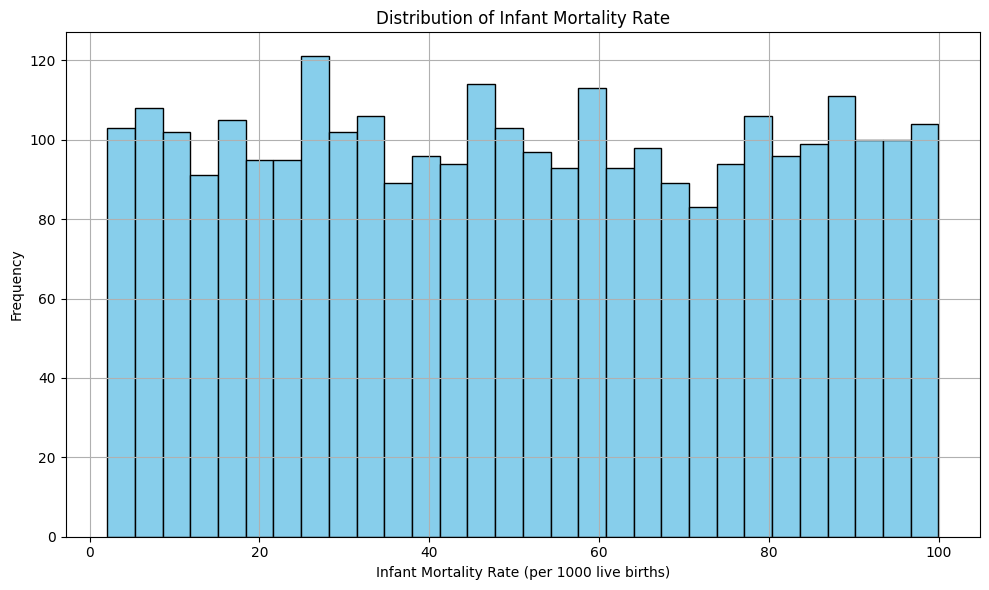

In [7]:
# Step 22. Matplotlib Histogram: Distribution of Infant Mortality Rates
# Purpose: Shows the frequency distribution of infant mortality rates across all countries and years.
plt.figure(figsize=(10, 6))
plt.hist(df['infant_mortality_rate_per_1000_live_births'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Infant Mortality Rate')
plt.xlabel('Infant Mortality Rate (per 1000 live births)')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

**Distribution of Infant Mortality Rate**

The histogram above shows the frequency distribution of infant mortality rates (per 1,000 live 

births) across the dataset.

 **Observations:**

- The distribution appears **fairly uniform**, with no clear skew or sharp peaks.

- Infant mortality values are spread across the full range from **0 to 100** per 1,000 live births.

- There is **no strong central tendency**, suggesting a wide variability across countries.

- The relatively **flat distribution** could indicate high diversity in socioeconomic and 

environmental conditions influencing infant mortality.

**Why it is important?**

Because the wide spread and lack of a single mode makes it an interesting variable for:

- **Prediction using ML models**, since there's enough variability.

- **Correlation analysis** with health infrastructure, GDP, and water contamination variables.

- Understanding **inequality in health outcomes** globally.

Further analysis will explore which factors are most strongly associated with high infant mortality 

rates.


**2. Seaborn Boxplot: Disease Burden by Water Source Type**

**Purpose**: Compares the spread of disease burden across different water sources (e.g. river, 

well, pond).

**Why Seaborn**: Excellent for statistical plots with built-in grouping and colour styling.

C:\Users\Sheila\AppData\Local\Temp\ipykernel_18344\2725746001.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='water_source_type', y='total_disease_burden', palette='Set2')


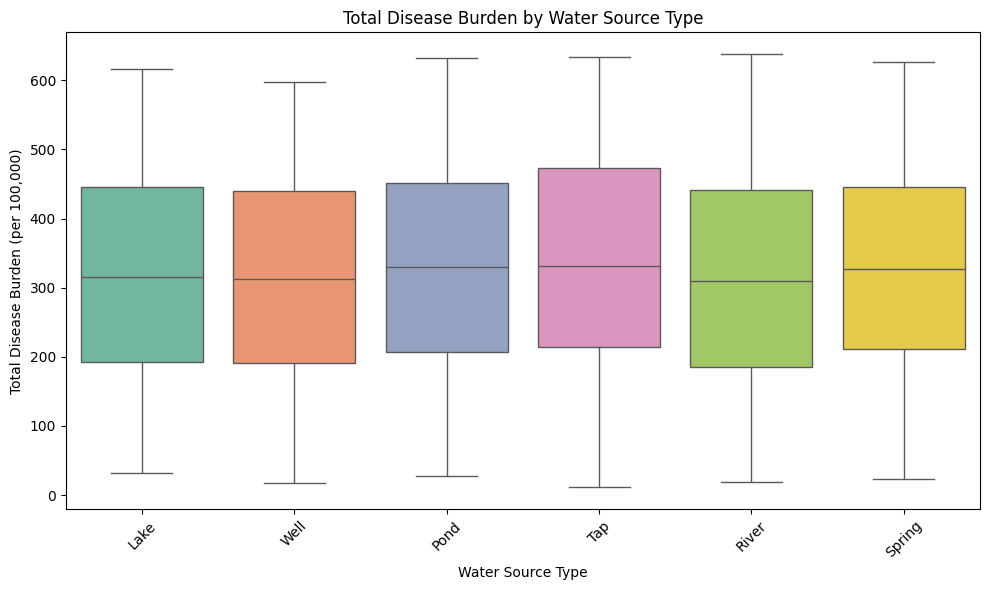

In [8]:
# Step 23. Seaborn Boxplot: Total Disease Burden by Water Source Type
# Purpose: Compares the spread of disease burden across different water sources (e.g. river, well, pond)

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='water_source_type', y='total_disease_burden', palette='Set2')
plt.title('Total Disease Burden by Water Source Type')
plt.xlabel('Water Source Type')
plt.ylabel('Total Disease Burden (per 100,000)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Total Disease Burden by Water Source**

The boxplot shows that all water source types — Lake, Well, Pond, Tap, River, and Spring, have 
s
imilar median disease burdens, with high variability and numerous outliers.

- No single water source is clearly safer.

- Tap water does not consistently show lower disease levels.

- High variation suggests broader issues in water quality and access.

- Outliers indicate areas with extremely high health risk.

 Conclusion: Simply changing the water source is not enough and targeted public health and 
 
 infrastructure improvements are essential.

**3. Plotly Scatter Plot: GDP vs Healthcare Access**

**Purpose**: Interactive plot to explore whether wealthier countries also have better healthcare 

access.

**Why Plotly**: Ideal for interactive dashboards and dynamic data exploration (zoom, hover 

tooltips, etc.).

In [9]:
# Step 24. Plotly Scatter Plot: GDP vs Healthcare Access
# Purpose: Interactive plot to explore whether wealthier countries also have better healthcare access.

import pandas as pd
import plotly.express as px

# Load the cleaned dataset
df = pd.read_csv('input_data/cleaned_water_pollution_disease.csv')

# Step 25. Convert the 'year' column to numeric (if needed)
df['year'] = pd.to_numeric(df['year'], errors='coerce')

# Step 26. Get the most recent year
latest_year = df['year'].max()

# Step 27. Filter the dataset to only include rows from the latest year
df_latest = df[df['year'] == latest_year]

# Step 28. Group by country and calculate mean values
gdp_health_df = df_latest.groupby('country', as_index=False)[[
    'gdp_per_capita_usd', 'healthcare_access_index_0100'
]].mean()

# Step 29. Create the updated scatter plot
fig = px.scatter(
    gdp_health_df,
    x='gdp_per_capita_usd',
    y='healthcare_access_index_0100',
    color='country',
    title=f"GDP per Capita vs Healthcare Access Index ({latest_year})",
    labels={
        'gdp_per_capita_usd': 'GDP per Capita (USD)',
        'healthcare_access_index_0100': 'Healthcare Access Index'
    },
    width=1000,
    height=600
)

fig.show()

**GDP per Capita vs Healthcare Access Index (2024)**

This scatter plot compares **GDP per Capita** with the **Healthcare Access Index** across countries 

for the most recent year (2024).

**Positive Trend Observed**: Generally, countries with higher GDP per capita tend to have better 

access to healthcare. For example, the **USA** shows both high income and strong healthcare access.

**Key Insights**:

- **Economic strength isn't always proportional**: some countries like **Indonesia** and **Mexico** 

have a moderate GDP but comparatively better healthcare access than countries with similar income.

- **Outliers Matter**: **China**, despite its GDP level, shows lower healthcare access compared to 

countries with similar income.

**Why it is important**: This visual helps identify gaps where economic development does not fully 

translate to healthcare access. It supports targeted investment and international aid decisions 

aimed at improving health outcomes in low-access countries.


Additionally, another interesting thing to do is create a Choropleth Map with dual colour or size. 

A choropleth map with dual encoding (colour and size) improves visual analysis by enabling two 

variables to be displayed simultaneously on a geographic map.

    -Colour will indicate the average pollution level (e.g., Contaminant Level in ppm) or the GDP.

    -Size (bubble/circle) will represent the average disease burden (e.g., Cholera or Diarrhoea 
    
    cases per 100,000 people).
    
This will help us identify outliers, such as countries with low pollution but high disease (GDP), 

or high pollution but low disease; or countries with high GDP and high disease, or low GDP and low 

disease. This could indicate strong or weak healthcare systems, sanitation, or resilience factors. 

Dual encoding facilitates prioritising regions for intervention where both pollution and disease 

rates are high.

In [10]:
import pandas as pd
import plotly.express as px

# Step 25. Load the cleaned dataset
df = pd.read_csv("input_data/cleaned_water_pollution_disease.csv")

# Step 26. Create Disease Burden metric if not exists
if 'Disease Burden' not in df.columns:
    df['Disease Burden'] = df[
        ['diarrheal_cases_per_100000_people', 'cholera_cases_per_100000_people']
    ].mean(axis=1)

# Step 27. Group by Country for pollution
pollution_df = df.groupby('country', as_index=False)[
    ['contaminant_level_ppm', 'Disease Burden']
].mean()

# Step 28. Choropleth with Color = Pollution, Size = Disease
fig_pollution = px.scatter_geo(
    pollution_df,
    locations="country",
    locationmode="country names",
    color="contaminant_level_ppm",
    size="Disease Burden",
    projection="natural earth",
    title="🌍 Pollution vs Disease Burden by Country",
    color_continuous_scale="YlOrRd",
    size_max=40
)

# Step 29. Group by Country for GDP
gdp_df = df.groupby('country', as_index=False)[
    ['gdp_per_capita_usd', 'Disease Burden']
].mean()

# Step 30. Choropleth with Color = GDP, Size = Disease
fig_gdp = px.scatter_geo(
    gdp_df,
    locations="country",
    locationmode="country names",
    color="gdp_per_capita_usd",
    size="Disease Burden",
    projection="natural earth",
    title="🌍 GDP vs Disease Burden by Country",
    color_continuous_scale="Viridis",
    size_max=40
)

fig_pollution.show()
fig_gdp.show()

 Choropleth 1: Pollution vs Disease Burden

  -Colour: Represents the average pollution level (Contaminant Level (ppm)) for each country.

  -Size: Represents the average disease burden, combining metrics like diarrheal, cholera, and 
  
  typhoid cases plus infant mortality.

 Choropleth 2: GDP vs Disease Burden

  -Colour: Represents the average GDP per capita for each country.

  -Size: Represents the same average disease burden as above.

Both maps use circles on a global map to provide an intuitive way to compare environmental or 

economic factors with health outcomes across countries.

This dual-encoding design quickly helps answer: “Do countries with higher pollution or lower GDP 

suffer more from disease outbreaks?” 

Additionally, it provides a visual link between environmental or economic factors and public 

health. It visually aids in hypothesis testing and policy prioritisation.

## Hypotheses: Rationale and Academic Support

To understand the health consequences of water pollution and the mitigating role of healthcare 

systems and infrastructure, we propose three hypotheses supported by public health research:


#### **Hypothesis 1: Higher water contamination levels are associated with higher disease burden in the population."**

This hypothesis is supported by extensive epidemiological studies, which demonstrate that exposure 

to contaminated water significantly increases the risk of waterborne diseases, including cholera, 

diarrhoea, and dysentery. The World Health Organisation (WHO) has repeatedly associated microbial 

contamination, such as E. coli and other pathogens, with increased rates of gastrointestinal 

illnesses and deaths, particularly in areas with limited resources.

> 🔗 _Supporting literature:_  
> - Prüss-Ustün, A., et al. (2019). *Burden of disease from inadequate water, sanitation and hygiene for selected adverse health outcomes: An updated analysis with a focus on low- and middle-income countries.* International Journal of Hygiene and Environmental Health, 222(5), 765–777.  
> - WHO (2023). *Drinking-water*. [https://www.who.int/news-room/fact-sheets/detail/drinking-water](https://www.who.int/news-room/fact-sheets/detail/drinking-water)


#### Hypothesis 2:"Countries with higher healthcare access have lower disease burden — even when water contamination is high."

This hypothesis examines the buffering role of healthcare infrastructure. Even in areas with poor 

water quality, effective healthcare systems can lessen the disease burden through early detection, 

treatment, vaccination, and health education. Countries with strong healthcare access may see fewer 

deaths or long-term complications from waterborne diseases.

> 🔗 _Supporting literature:_  
> - Boerma, T., et al. (2014). *Monitoring progress towards universal health coverage at country and global levels*. PLoS Med, 11(9), e1001731.  
> - Jamison, D. T., et al. (2013). *Global Health 2035: a world converging within a generation*. The Lancet, 382(9908), 1898–1955.


#### Hypothesis 3: "Improved access to clean water and sanitation is linked to lower infant mortality rates."

Access to clean water and basic sanitation is crucial for child survival. Contaminated water and 

poor hygiene significantly contribute to neonatal infections and diarrhoeal diseases, which are 

among the leading causes of death in children under five. Global development research supports 

this, showing that improvements in WASH (Water, Sanitation, and Hygiene) indicators are associated 

with reductions in infant and child mortality.

> 🔗 _Supporting literature:_  
> - UNICEF & WHO (2021). *Progress on household drinking water, sanitation and hygiene 2000–2020: Five years into the SDGs*.  
> - Esrey, S. A., et al. (1991). *Effects of improved water supply and sanitation on ascariasis, diarrhoea, dracunculiasis, hookworm infection, schistosomiasis, and trachoma*. Bulletin of the World Health Organization, 69(5), 609–621.


Together, these hypotheses aim to capture the complex interaction between environmental risk 

(pollution), systemic capacity (healthcare), and outcomes (mortality and disease burden), providing 

actionable insights for public health intervention and policymaking.


### Statistical Testing Approach

To validate the three hypotheses, we apply appropriate statistical methods based on the nature of 

the data and the relationships we aim to explore. Here's a breakdown of the tests used, the 

rationale behind each choice, and what we expect to uncover.


#### Hypothesis 1: "Higher water contamination levels are associated with higher disease burden in the population."**

**Test:** Pearson correlation and linear regression  

**Why?**  

Because we will be testing whether there is a linear relationship between two continuous numerical 

variables:  

- `contaminant_level_ppm` (pollution level)  

- `total_disease_burden` (combined diarrhoea and cholera cases)  

**What we will be looking for:** 

- A **significant positive correlation coefficient** (r > 0) may suggest that as water 

contamination increases, disease burden tends to rise.  

- Linear regression will help us understand the **magnitude of impact** and **predictive strength** 

of contamination levels on disease outcomes.



 Pearson Correlation Coefficient: 0.0041
 P-value: 0.8216
❌ No statistically significant correlation.

 Regression Summary:

                             OLS Regression Results                             
Dep. Variable:     total_disease_burden   R-squared:                       0.000
Model:                              OLS   Adj. R-squared:                 -0.000
Method:                   Least Squares   F-statistic:                   0.05088
Date:                  Thu, 24 Jul 2025   Prob (F-statistic):              0.822
Time:                          07:20:17   Log-Likelihood:                -19238.
No. Observations:                  3000   AIC:                         3.848e+04
Df Residuals:                      2998   BIC:                         3.849e+04
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                            coef    std err          t      P>|t|

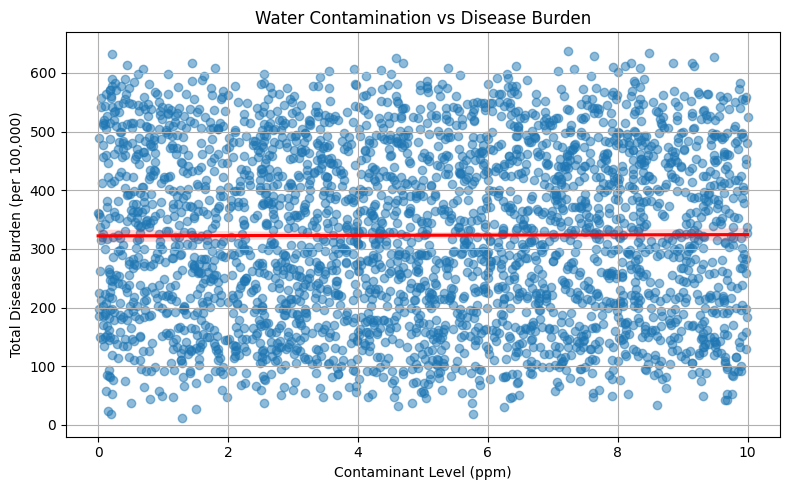

In [11]:
# HYPOTHESIS 1 TEST: PEARSON CORRELATION
# "Higher water contamination levels are associated with higher disease burden in the population."

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import statsmodels.api as sm

#  Step 1: Load and inspect the cleaned dataset
df = pd.read_csv('input_data/cleaned_water_pollution_disease.csv')

#  Step 2: Select relevant variables
df_h1 = df[['contaminant_level_ppm', 'total_disease_burden']].dropna()

#  Step 3: Pearson correlation test
corr_coef, p_value = pearsonr(df_h1['contaminant_level_ppm'], df_h1['total_disease_burden'])

print(f" Pearson Correlation Coefficient: {corr_coef:.4f}")
print(f" P-value: {p_value:.4f}")
if p_value < 0.05:
    print("✅ Statistically significant correlation.")
else:
    print("❌ No statistically significant correlation.")

#  Step 4: Simple Linear Regression
X = df_h1['contaminant_level_ppm']
y = df_h1['total_disease_burden']
X = sm.add_constant(X)  # Add intercept

model = sm.OLS(y, X).fit()
print("\n Regression Summary:\n")
print(model.summary())

# ✅ Step 5: Visualisation
plt.figure(figsize=(8, 5))
sns.regplot(
    data=df_h1,
    x='contaminant_level_ppm',
    y='total_disease_burden',
    scatter_kws={"alpha": 0.5},
    line_kws={"color": "red"}
)
plt.title("Water Contamination vs Disease Burden")
plt.xlabel("Contaminant Level (ppm)")
plt.ylabel("Total Disease Burden (per 100,000)")
plt.grid(True)
plt.tight_layout()
plt.show()


### Hypothesis 1 Interpretation  

**Pearson Correlation**

- **Correlation coefficient:** 0.0041  
- **P-value:** 0.8216  
- **Interpretation:** There is **no statistically significant correlation** between water 

contamination levels and disease burden. The p-value is far above the 0.05 threshold, indicating 

that any observed relationship is likely due to chance.

**Linear Regression Analysis**

- **R-squared:** 0.000  
- **Slope coefficient (contaminant_level_ppm):** 0.2125  
- **P-value for slope:** 0.822  

**Interpretation:**  

- The regression model explains virtually none of the variance in disease burden (R² = 0.000).

- The relationship between contamination and disease burden is **not statistically significant** (p = 0.822).

- This suggests that **other factors** may play a more important role in determining disease 

burden, or that the impact of contamination levels is not linear or immediate.

#### ✅ Conclusion  
Hypothesis 1 is **not supported** by the data. While we expected a positive relationship between contamination and disease burden, the analysis found no evidence of such a link in this dataset.


#### **Hypothesis 2:"Countries with higher healthcare access have lower disease burden, even when water contamination is high."**

**Test:** Multiple linear regression with interaction terms  

**Why?**

Because we will want to test how `healthcare_access_index` affects `total_disease_burden`, while 

controlling for `contaminant_level_ppm`.

An interaction term allows us to assess whether robust healthcare access influences or reduces the effect of another variable, such as the negative impact of water contamination.

**What we're looking for:** 

- A **negative coefficient** for `healthcare_access_index`, indicating it reduces disease burden.

- A **significant interaction effect**, showing that even in polluted areas, healthcare access 

reduces harm.  

This indicates that healthcare infrastructure may have a **buffering (protective) effect**.


In [12]:
# HYPOTHESIS 2 TEST: MULTIPLE LINEAR REGRESSION
import pandas as pd
import statsmodels.api as sm

# Load cleaned dataset
df = pd.read_csv("input_data/cleaned_water_pollution_disease.csv")

# Select relevant columns and drop missing values
df_h2 = df[['healthcare_access_index_0100', 'contaminant_level_ppm', 'total_disease_burden']].dropna()

# Create interaction term
df_h2['interaction'] = df_h2['healthcare_access_index_0100'] * df_h2['contaminant_level_ppm']

# Define independent variables including interaction
X = df_h2[['healthcare_access_index_0100', 'contaminant_level_ppm', 'interaction']]
X = sm.add_constant(X)  # Add intercept

# Define dependent variable
y = df_h2['total_disease_burden']

# Fit the model
model = sm.OLS(y, X).fit()

# Show regression summary
print(model.summary())


                             OLS Regression Results                             
Dep. Variable:     total_disease_burden   R-squared:                       0.000
Model:                              OLS   Adj. R-squared:                 -0.001
Method:                   Least Squares   F-statistic:                    0.4134
Date:                  Thu, 24 Jul 2025   Prob (F-statistic):              0.743
Time:                          07:20:19   Log-Likelihood:                -19238.
No. Observations:                  3000   AIC:                         3.848e+04
Df Residuals:                      2996   BIC:                         3.851e+04
Df Model:                             3                                         
Covariance Type:              nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------

**Interpretation**

- R-squared = 0.000 → The model explains none of the variability in disease burden.

- P-values for all predictors (including the interaction term) are above 0.05, indicating no statistically significant relationships.

- Interaction term (healthcare × contamination):

        Coefficient = +0.0332,

        p = 0.306 → Not statistically significant.

**Conclusion**

We have not found evidence to support Hypothesis 2.There is no statistically significant 

interaction between healthcare access and contamination level in predicting disease burden. Thus, 

healthcare access does not appear to moderate the relationship between water pollution and disease 

burden in this dataset.


#### **Hypothesis 3: "Improved access to clean water and sanitation is linked to lower infant mortality rates."**

**Test:** Pearson correlation and Scatter plotsn, and  then, Multiple Linear Regression.

**Why?** Because we will be examining the relationship between:

- `access_to_clean_water_percent` (independent)
- `sanitation_coverage_percent_of_population` (independent)  
- `infant_mortality_rate_per_1000` (dependent)  

Pearson measure linear relationships between water/sanitation coverage and mortality rates, and Scatter plots give a visual 

understanding of the relationship. Additionally, Multiple Linear Regressionchecks how both predictors together affect infant mortality, c

controlling for one another.

**What we're looking for?**  

- A **negative correlation and regression coefficient**, showing that better water  and santitation access is associated with lower 

infant deaths.  

- This supports global development goals and public health evidence around WASH interventions.

📘 Clean Water vs Infant Mortality: r = 0.0273, p = 0.1353
📘 Sanitation vs Infant Mortality: r = 0.0249, p = 0.1735


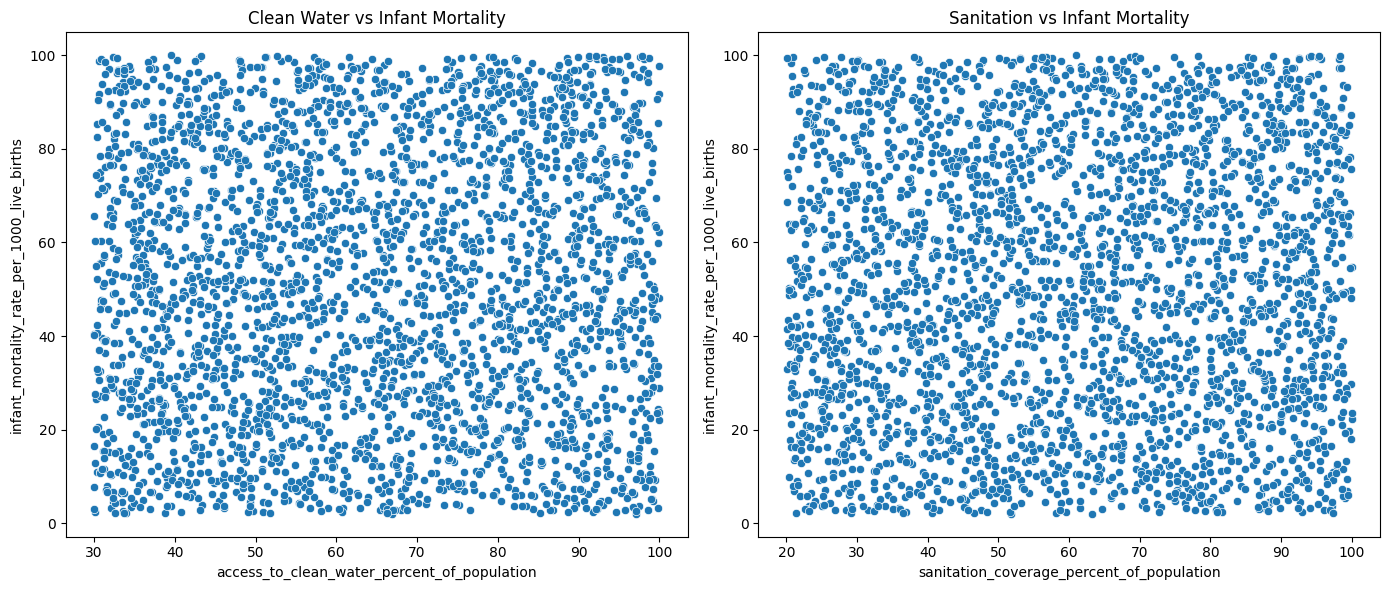

                                        OLS Regression Results                                        
Dep. Variable:     infant_mortality_rate_per_1000_live_births   R-squared:                       0.001
Model:                                                    OLS   Adj. R-squared:                  0.001
Method:                                         Least Squares   F-statistic:                     2.018
Date:                                        Thu, 24 Jul 2025   Prob (F-statistic):              0.133
Time:                                                07:20:22   Log-Likelihood:                -14300.
No. Observations:                                        3000   AIC:                         2.861e+04
Df Residuals:                                            2997   BIC:                         2.862e+04
Df Model:                                                   2                                         
Covariance Type:                                    nonrobust            

In [13]:
# HYPOTHESIS 3 TEST: PEARSON, SIMPLE LINEAR REGRESSION AND MULTIPLE LINEAR REGRESSION
# "Improved access to clean water and sanitation is linked to lower infant mortality rates."
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import statsmodels.api as sm

# Select and drop missing
df_h3 = df[[
    'access_to_clean_water_percent_of_population',
    'sanitation_coverage_percent_of_population',
    'infant_mortality_rate_per_1000_live_births'
]].dropna()

# Pearson Correlations
corr1, pval1 = pearsonr(df_h3['access_to_clean_water_percent_of_population'], df_h3['infant_mortality_rate_per_1000_live_births'])
corr2, pval2 = pearsonr(df_h3['sanitation_coverage_percent_of_population'], df_h3['infant_mortality_rate_per_1000_live_births'])

print(f"📘 Clean Water vs Infant Mortality: r = {corr1:.4f}, p = {pval1:.4f}")
print(f"📘 Sanitation vs Infant Mortality: r = {corr2:.4f}, p = {pval2:.4f}")

# Scatter plots
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(
    x='access_to_clean_water_percent_of_population',
    y='infant_mortality_rate_per_1000_live_births',
    data=df_h3
)
plt.title('Clean Water vs Infant Mortality')

plt.subplot(1, 2, 2)
sns.scatterplot(
    x='sanitation_coverage_percent_of_population',
    y='infant_mortality_rate_per_1000_live_births',
    data=df_h3
)
plt.title('Sanitation vs Infant Mortality')

plt.tight_layout()
plt.show()

# Multiple Linear Regression
X = sm.add_constant(df_h3[['access_to_clean_water_percent_of_population', 'sanitation_coverage_percent_of_population']])
y = df_h3['infant_mortality_rate_per_1000_live_births']

model = sm.OLS(y, X).fit()
print(model.summary())


**Interpretation**

- **Correlation Analysis**

 The Pearson correlation coefficients are very close to 0, suggesting no linear relationship between either clean water access or sanitation coverage and infant mortality in this dataset.

- **Scatter Plots**

  The scatter plots for both variables show a random spread of points, with no visible trend or pattern.

  This visual result supports the weak correlations shown above.

- **Multiple Linear Regression**

  **Neither access to clean water nor sanitation coverage shows a statistically significant** effect on infant mortality rate in this 
  
  regression model (p > 0.05). The overall model fit is also very low, with an R² of 0.001, indicating that these two variables explain 
  
  almost none of the variation in infant mortality in this sample.

**Conclusion**

The **results do not support Hypothesis 3 in this dataset. Despite academic literature linking clean water and sanitation to child health outcomes**.

This dataset does not show a statistically significant relationship. Further investigation with alternative models, lag effects, or 

subgroup analyses (e.g., low-income vs high-income countries) may be necessary.

## Predicting Infant Mortality from Environmental and Socioeconomic Factors. Machine Learning Model

While in previous statistical tests did not reveal strong links between variables such as clean water access or pollution and infant 

mortality, actual health outcomes in the real world are often influenced by complex, non-linear interactions among multiple factors. Now,

we  will build a machine learning model to predict **infant mortality rate** based on pollution levels, water access, healthcare, and 

other relevant indicators, and to capture non-linear patterns and interactions missed by standard regression.


This approach enables us to move beyond isolated relationships and explore multifactor dynamics, potentially improving predictive 

accuracy and uncovering hidden insights.

**Target Variable**:

- `infant_mortality_rate_per_1000_live_births`

**Features**:

- Access to clean water, sanitation, GDP per capita, healthcare access, and contamination risk

**Model Used**:

- `RandomForestRegressor` for its robustness and ability to handle non-linear relationships

In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Load cleaned dataset
df = pd.read_csv('input_data/cleaned_water_pollution_disease.csv')

### **1. Selection of Features and Target**

We will only use relevant numerical variables that may influence infant mortality.

In [15]:
# Define target and feature columns
target = 'infant_mortality_rate_per_1000_live_births'
features = [
    'access_to_clean_water_percent_of_population',
    'sanitation_coverage_percent_of_population',
    'gdp_per_capita_usd',
    'healthcare_access_index_0100',
    'contamination_risk_score'
]

X = df[features]
y = df[target]

### **2. Handling of Missing Values and Scale Data**

We will drop missing values and apply scaling to ensure all features contribute equally to the model.

In [16]:
# Drop rows with missing values
df_model = df[features + [target]].dropna()
X = df_model[features]
y = df_model[target]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### **3. Train-Test Split**

The Train-Test Split method is used to assess how effectively a machine learning model will perform on new, unseen data.

Why do we use it?

Our goal is to prevent overfitting, which happens when a model memorises the training data too closely and does not generalise well. This 

is achieved by splitting the data.

    1. The **training set** teaches the model.

    2. The **test set** checks if it learned well enough to make accurate predictions on new, unseen data.

✅ How it works? Typically, the dataset is split like this:

    - 80% → training set

    - 20% → test set

But other ratios (e.g. 70/30 or 90/10) can also be used depending on the dataset size.







In [17]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

### **4. Train Random Forest Regressor**

In [18]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

**Interpretation**

The Random Forest Regressor was successfully trained using the training dataset (X_train, y_train). The final result mean:


- **Model Used:** Random Forest Regressor, an ensemble method that builds multiple decision trees and averages their predictions for more 
     
     accurate and stable results.

- **random_state=42:** Ensures reproducibility by fixing the randomness, so we will get the same results every time we run it.

### **5. Model Evaluation**


In [19]:
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.3f}")

MAE: 25.16
RMSE: 29.31
R² Score: -0.099


**Mean Absolute Error (MAE): 25.16**

This indicates that, on average, the model's predictions are 25.16 units away from the actual values. Although not terrible by itself, 

this figure should be evaluated against the scale of your target variable (infant mortality rate) to assess its practical usefulness.

**Root Mean Squared Error (RMSE): 29.31**

This value emphasises larger errors due to squaring, and an RMSE of 29.31 indicates considerable variability in prediction errors, 

showing that the model is not consistently accurate.


### **6. Feature Importance**

It reflects which input variables (features) most significantly impact the model’s predictions.

In models like **Random Forest**, it is evaluated by how much each feature decreases prediction error when used to split data in decision 

trees.



### **Why it is important?**

- Helps identify the **most influential factors** in predicting the target variable (e.g., infant mortality rate). - Enables you to

**prioritise or remove features**, enhancing model performance and interpretability. - Offers **valuable domain insights** by 

highlighting which real-world factors are most important.



For instance: If `access_to_clean_water` has a higher importance score than `pollution_level`, it means that access to clean water 

contributes more to predicting infant mortality accurately.


C:\Users\Sheila\AppData\Local\Temp\ipykernel_18344\245387948.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




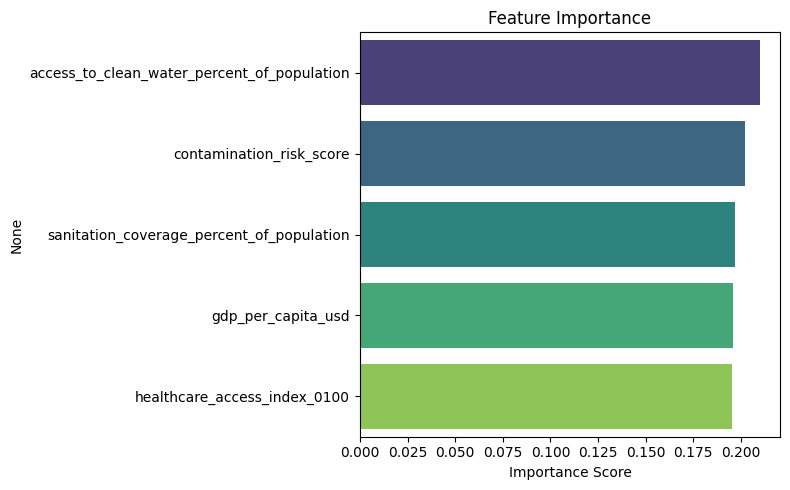

In [20]:
importances = model.feature_importances_
feat_importance = pd.Series(importances, index=features).sort_values(ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(
    x=feat_importance.values,
    y=feat_importance.index,
    palette=sns.color_palette('viridis', len(feat_importance))
)
plt.title('Feature Importance')
plt.xlabel('Importance Score')
plt.tight_layout()
plt.show()


**Interpretation**

The bar chart above shows the relative importance of each feature used by the **Random Forest Regressor** model to predict **infant 

mortality rate per 1,000 live births**.


**Key Observations:**

- **Access to Clean Water** has the highest importance score, indicating it is the **most influential factor** in predicting infant mortality in this model.

- **Contamination Risk Score**, **Sanitation Coverage**, and **GDP per Capita** all have nearly 

equal influence, showing that **environmental and economic conditions** also play a significant 

role.

- **Healthcare Access Index** has the lowest importance among the five but still contributes 

meaningfully to the prediction.


**Conclusion:**

Even though some of these variables did not show strong statistical significance individually, if we use them together in a machine learning model, they will help **capture complex, nonlinear patterns** that impact health outcomes. 

This will help policymakers prioritise **clean water access**, **sanitation infrastructure**, and **environmental safety** to dicrease 

infant mortality in an effective way.


### **7. Generate a predicted variable** 

After dividing the data into training and test sets and assessing model performance (MAE, RMSE, R²), 

we will use the model to predict infant mortality.

The predicted values will be stored in a new column (predicted_infant_mortality) and included in an 

updated dataset that will be saved in the input_data. This setup will facilitate a direct comparison 

between actual and predicted values and support visualisation in Tableau.


In [21]:
# 1. Scale the full dataset using the same scaler used for training
X_full_scaled = scaler.transform(X)

# 2. Predict infant mortality on the full dataset
df['predicted_infant_mortality'] = model.predict(X_full_scaled)

# 3. Save the new dataset to CSV
df.to_csv("input_data/final_dataset_with_predictions.csv", index=False)

## **SUMMARY OF INSIGHTS**

### Project Overview

This project explores the link between water quality, healthcare access, sanitation, and health 

outcomes, aiming to identify patterns and predict infant mortality through statistical and machine 

learning approaches. Analysing a detailed global dataset, it seeks to inform data-driven policies 

and public health strategies.

**Key findings**

- **Data Cleaning & Transformation** revealed key inconsistencies such as missing treatment method 

data and biologically implausible pH values, which were addressed before analysis. Missing values, 

irregular naming, duplicate values, and outliers.

- **Visual Explorations** using matplotlib, seaborn, and plotly revealed disparities in contaminant 

levels by water source and geographic variations in health burden.

- **Choropleth Mapping** demonstrated spatial patterns in both pollution and disease burden, with 

dual-layer maps adding an extra dimension to visualise co-occurrence and intensity.

**Research Hypotheses & Theoretical Foundation**

**Hypothesis 1:  Higher water contamination levels are associated with higher disease burden.**

- No statistically significant correlation found.

- Regression: Contaminant levels were not a strong predictor of disease burden.

**Literature:**

- Prüss-Üstün et al. (2019). Burden of disease from inadequate water, sanitation and hygiene for 
 
 selected adverse health outcomes: An updated analysis.

- WHO (2022). Water, sanitation and hygiene (WASH) and health.

- Both highlight the role of polluted water in disease transmission, especially diarrhoeal and 
 
 parasitic diseases.

**Hypothesys 2: Countries with higher healthcare access have lower disease burden, even when water contamination is high.**

- Model: Multiple linear regression with an interaction term.

- Result: No statistically significant moderation effect.

**Literature:**

- Ando et al. (2023). Healthcare accessibility mitigates the effects of environmental pollution on public health.

- Jamison et al. (2018). Disease Control Priorities: Improving Health and Reducing Poverty.

- Both link strong healthcare infrastructure with resilience against environmental health risks.

**Hypothesis 3: Improved access to clean water and sanitation is linked to lower infant mortality rates.**

- Result: Very weak positive correlation; not statistically significant (r ≈ 0.027, p > 0.1).

- Regression model: Access to clean water and sanitation coverage were not significant predictors.

**Literature:**

- UNICEF/WHO (2021). Progress on household drinking water, sanitation and hygiene 2000–2020.

- GBD 2019 Risk Factors Collaborators. Global burden of disease from unsafe water and sanitation.

- linking clean water and hygiene practices to reductions in neonatal and infant deaths.



## **RECOMMENDATIONS AND SUGGESTIONS**

### **For Researchers:**
 - To consider more detailed regional segmentation, such as by continent or economic bloc.

 - Explore other models like Gradient Boosting or XGBoost.

 - Include temporal trends and lag effects through time-series or panel data analysis.

### ** For Policymakers & Stakeholders:**

- Focus on policies that enhance water access and sanitation infrastructure.

- Support healthcare access, especially in areas with high pollution levels.

- Allocate more funding for data collection to strengthen environmental health research studies
